In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [14]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path
BASE = Path.cwd().parents[1] / "python-server" / "app" / "data_pipeline"
ACT = BASE / "actual_2025.csv"
PRE = BASE / "prediction_2025.csv"


actual = pd.read_csv(ACT, parse_dates=["target_date"])
pred   = pd.read_csv(PRE, parse_dates=["target_date"])

FEA = BASE / "features_all.csv"
fea = pd.read_csv(FEA)

cat_map = fea[["product_code", "cat_low"]].drop_duplicates()

# 카테고리 정보 merge
actual = actual.merge(cat_map, on="product_code", how="left")
pred   = pred.merge(cat_map, on="product_code", how="left")



전체 품목 1년 MAPE: 5.01%


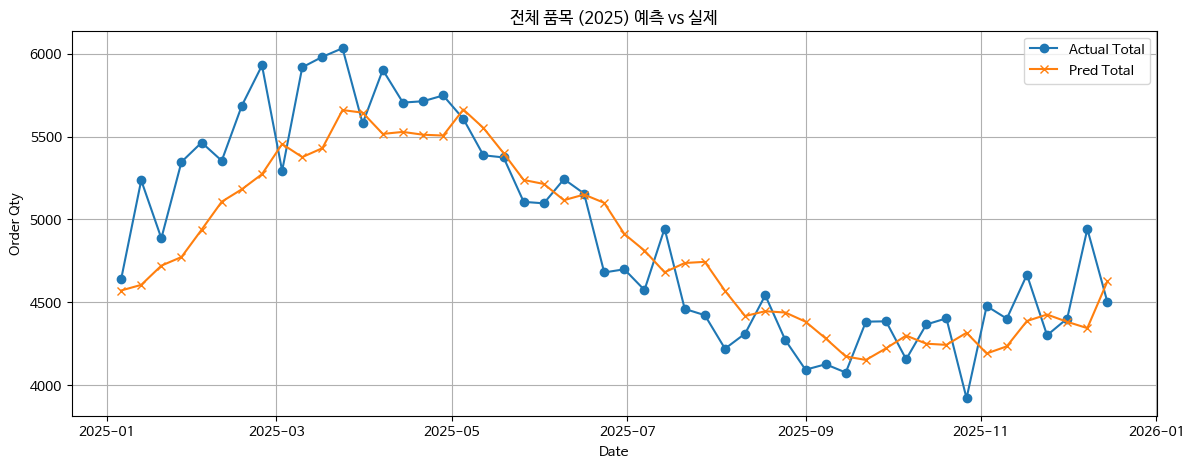

In [16]:
total_actual = actual.groupby("target_date")["actual_order_qty"].sum().reset_index()
total_pred   = pred.groupby("target_date")["y_pred"].sum().reset_index()

df_total = total_actual.merge(total_pred, on="target_date", how="left")

# MAPE 계산
def mape(y, y_pred):
    return np.mean(np.abs((y - y_pred) / (y + 1e-9))) * 100

total_mape = mape(df_total["actual_order_qty"], df_total["y_pred"])

print(f"전체 품목 1년 MAPE: {total_mape:.2f}%")

# Plot
plt.figure(figsize=(14, 5))
plt.plot(df_total["target_date"], df_total["actual_order_qty"], label="Actual Total", marker="o")
plt.plot(df_total["target_date"], df_total["y_pred"], label="Pred Total", marker="x")
plt.title("전체 품목 (2025) 예측 vs 실제")
plt.xlabel("Date")
plt.ylabel("Order Qty")
plt.legend()
plt.grid(True)
plt.show()



랜덤 선택 SKU: AIR-SAM-15평-초미세먼지-00074
 AIR-SAM-15평-초미세먼지-00074의 2025년 MAPE: 12.12%


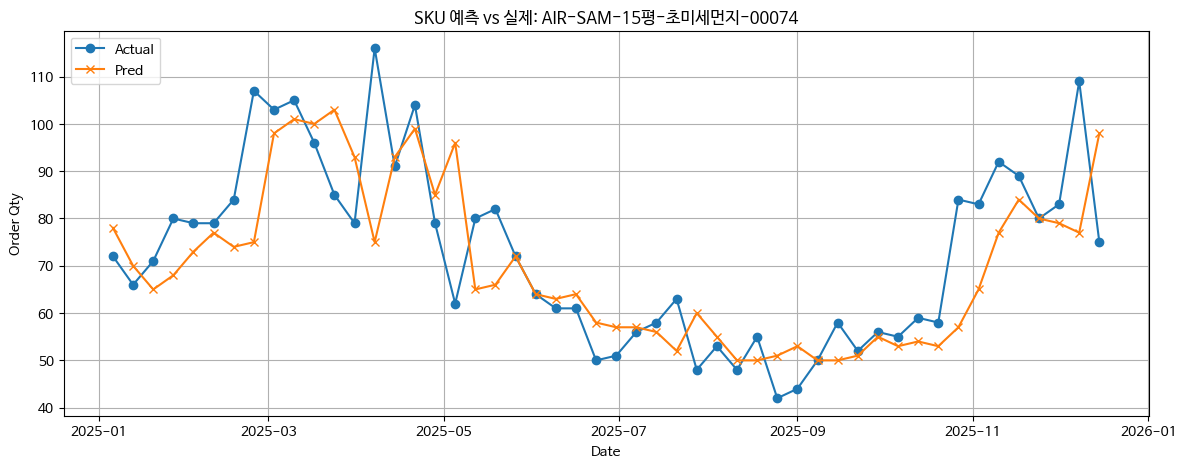

In [28]:

rand_sku = random.choice(pred["product_code"].unique())
print("랜덤 선택 SKU:", rand_sku)

act_sku = actual[actual["product_code"] == rand_sku]
prd_sku = pred[pred["product_code"] == rand_sku]

df_sku = act_sku.merge(prd_sku[["product_code", "target_date", "y_pred"]],
                       on=["product_code","target_date"], how="left")

sku_mape = mape(df_sku["actual_order_qty"], df_sku["y_pred"])

print(f" {rand_sku}의 2025년 MAPE: {sku_mape:.2f}%")

# Plot
plt.figure(figsize=(14, 5))
plt.plot(df_sku["target_date"], df_sku["actual_order_qty"], label="Actual", marker="o")
plt.plot(df_sku["target_date"], df_sku["y_pred"], label="Pred", marker="x")
plt.title(f"SKU 예측 vs 실제: {rand_sku}")
plt.xlabel("Date")
plt.ylabel("Order Qty")
plt.grid(True)
plt.legend()
plt.show()



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2636\2290414817.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: mape(x["actual_order_qty"], x["y_pred"]))



카테고리별 오차율 (MAPE %)
   cat_low       MAPE
0       TV  13.325239
1      건조기  12.835995
2    공기청정기  11.713612
3      냉장고  15.801987
4      노트북  13.360935
5     데스크탑  16.303023
6      라우터  19.572029
7      모니터  12.404681
8      믹서기  13.812040
9      세탁기  16.433734
10   스마트워치  16.003005
11    스마트폰  14.678531
12   식기세척기  14.420127
13     에어컨  15.121136
14      오븐  15.793978
15   전자레인지  14.177445
16     청소기  15.307271
17    커피머신  11.257442
18    토스터기  15.092971
19     프린터  13.599642


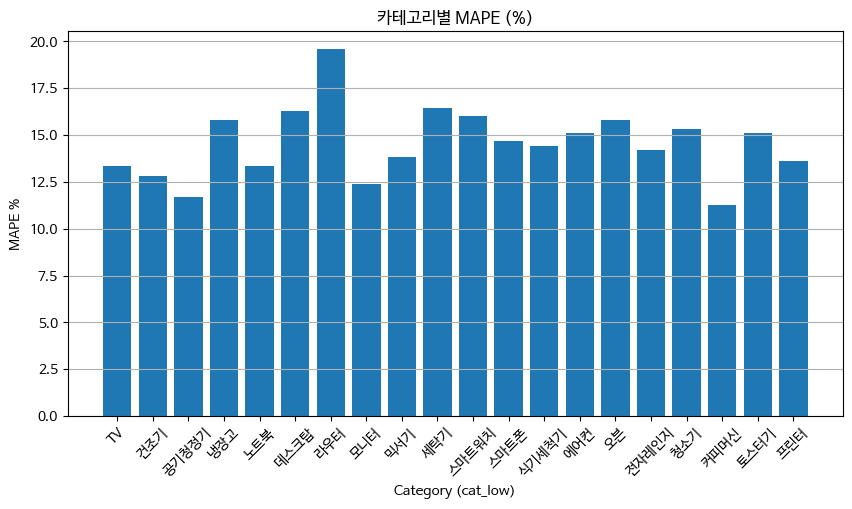

In [27]:

act_cat = actual.groupby(["cat_low", "target_date"])["actual_order_qty"].sum().reset_index()
prd_cat = pred.groupby(["cat_low", "target_date"])["y_pred"].sum().reset_index()

df_cat = act_cat.merge(prd_cat, on=["cat_low", "target_date"], how="left")

# 카테고리별 MAPE 계산
cat_mape = (
    df_cat.groupby("cat_low")
          .apply(lambda x: mape(x["actual_order_qty"], x["y_pred"]))
          .reset_index()
)
cat_mape.columns = ["cat_low", "MAPE"]

print("\n카테고리별 오차율 (MAPE %)")
print(cat_mape)

# Bar Plot
plt.figure(figsize=(10, 5))
plt.bar(cat_mape["cat_low"], cat_mape["MAPE"])
plt.title("카테고리별 MAPE (%)")
plt.xlabel("Category (cat_low)")
plt.ylabel("MAPE %")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
